# Project 5 Gaming Industry

This project is for "BigStream" online Game store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. 
The task is to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns. You have data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data.

The abbreviation ESRB (Entertainment Software Rating Board) comes across in the data set - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen. Data for 2016 may not be complete.

### Data Fields:
* Name - the name of the game
* Platform - platform
* Year_of_Release - year of release
* Genre - game genre
* NA_sales - sales in North America (millions of copies sold)
* EU_sales - sales in Europe (millions of copies sold)
* JP_sales - sales in Japan (millions of copies sold)
* Other_sales - sales in other countries (millions of copies sold)
* Critic_Score - Critics score (max 100)
* User_Score - user score (maximum 10)
* Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.



In [1]:
# import libraries and methods
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
from scipy import stats as st

## Step 1. Open the data file and study the general information


In [2]:
try:
    data_row = pd.read_csv("/Users/dmitry/Documents/Python DS/Modul 1/datasets_modul1/datasets_sumup_games/games.csv")
except:
    data_row = pd.read_csv("/datasets/games.csv")

data_row.info()
display(data_row.describe())

display(data_row.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Let's look at the duplicates and remove the explicit duplicates and duplicates by name and platform

In [3]:
#Check the explicit duplicates
if data_row.duplicated().sum()==0:
    print("\n No explicit duplicates")
    
else:
    print("\n Detected", data.duplicated().sum(), "duplicates")


 No explicit duplicates


Let's check duplicates by name and platform

In [4]:
rows_duplicated = data_row[['Name','Platform']].duplicated(keep=False).sort_values()
display(data_row.loc[rows_duplicated].head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Calculate the number of NaN's

In [5]:
print("Total sales of Nan:")
sum_of_nan = sum(data_row.loc[ 659,["NA_sales","EU_sales","JP_sales","Other_sales"]])+ sum(data_row.loc[14244,["NA_sales","EU_sales","JP_sales","Other_sales"]])
print(sum_of_nan)

total_sales_raw = sum(data_row["NA_sales"] + data_row["EU_sales"] + data_row["JP_sales"]+ data_row["Other_sales"])
print("Total % sales of Nan in total sales:")
print(sum_of_nan/total_sales_raw)


Total sales of Nan:
2.42
Total % sales of Nan in total sales:
0.00027143099091375407


Let's delete duplicates by name and platform. I deleted Madden NFL 13, Sonic the Hedgehog and Nan as a duplicates. But Need for Speed: Most Wanted has different years 2005 and 2012. So this is a remaster, let's keep it.  


In [6]:
data_row = data_row.drop(index = [1591,659, 4127, 14244, 16230]).reset_index(drop = True)
display(data_row.loc[data_row["Name"] == "Need for Speed: Most Wanted"].head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1189,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1996,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2046,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3579,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5969,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6270,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6407,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6470,Need for Speed: Most Wanted,GBA,2005.0,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E


Conclusion step 1:
* there are no explicit duplicates detected
* There is 'Nan' data for two items. I checked if it was possible to process it. There are <<1% passed values, so we can delete them
* I discovered that:
** year of release is float type, but int type fitts better 
** there are a lot of miss values in Critic_Score, User_Score, Rating
** The age rating is for games in the USA and Canada. If the game didn't release there, then most likely they didn't have a rating either. There could be missed values from here. 

## Step 2: Data preprocessing
Let's:
* Convert data to the distinguish types. Describe in which columns the data type was replaced and why;
* Process the allowances if necessary
* Explain why you filled in the gaps in a certain way or why you did not do it
* Describe the reasons that could lead to omissions
* Note the abbreviation 'tbd' in the user rating column. Separately analyze this value and describe how to process it
* Calculate the total sales in all regions and record them in a separate column.


I'm replacing column names and bringing them to lowercase

In [7]:
# create a new dataset
data = data_row

#let's bring the columns to the snake register
data.columns = data.columns.str.lower()

let's check if there are any duplicates in the platforms due to different case. if there are, then we will bring  it to lowercase 

In [8]:
print("\n genre \n", data["genre"].value_counts())
print("\n platform \n", data["platform"].value_counts())
print("\n rating \n", data["rating"].value_counts())


 genre 
 Action          3369
Sports          2347
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1248
Platform         887
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

 platform 
 PS2     2161
DS      2151
PS3     1329
Wii     1320
X360    1261
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

 rating 
 E       3989
T       2960
M       1563
E10+    1419
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


Conclusion: there are no duplicates in genre and platform, so I'll leave the names unchanged

rating K-A is the old version for category E. Let's Replace these values.

In [9]:
data["rating"] = data["rating"].replace("K-A", "E")

There are too many values in the user_score and critic_score columns to check them only with the value_counts method. For them, we call the unique() method

In [10]:
print(data["user_score"].value_counts())
print(data["user_score"].unique())

print("\ncritic_score")
print(data["critic_score"].value_counts())
print(data["critic_score"].unique())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

critic_score
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: critic_score, Length: 82, dtype: int64
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 

Conclusion Step 2.1:
* There is a tbd value in the user_score column
* In half of the values where user_score == tbd, we know critic_score. Let's try to estimate their correlation

## Step 2.2 Checking the missing values male data according to

Let's check how much of the missing values are in each of the missing columns

In [11]:
# Let's create a function that outputs the number of gaps in the dataframe column
def isna_data_count(df):
    for i in df.columns:
        isna_count = df[i].isna().mean()
        print("% of missing values", i, f'{isna_count:.2%}')
    return 0

isna_data_count(data)

% of missing values name 0.00%
% of missing values platform 0.00%
% of missing values year_of_release 1.60%
% of missing values genre 0.00%
% of missing values na_sales 0.00%
% of missing values eu_sales 0.00%
% of missing values jp_sales 0.00%
% of missing values other_sales 0.00%
% of missing values critic_score 51.32%
% of missing values user_score 40.09%
% of missing values rating 40.48%


0

Conclusion:
* there are also missing values in the name column, but they are not visible from the operation of the isna_data_count function, but can be seen by the describe method

Let's check the possibility to restore the value of user_score via critic_score or vice versa

In [12]:
# Let's check if these values can be replaced - to do this, check the average of the available data
rows_scores = ~((data["user_score"].isna()) | (data["critic_score"].isna()))
data_scores = data.loc[rows_scores].reset_index(drop = True)

# I am checking the values where user_score is present and critic_score is missing 
rows = (~data["user_score"].isna()) & (data["critic_score"].isna())
display(data.loc[rows].shape)
display(data.loc[rows].head(50))

data_scores.info()


(1915, 11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
359,Just Dance 2014,Wii,2013.0,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+
437,Club Penguin: Elite Penguin Force,DS,2008.0,Adventure,1.87,0.97,0.00,0.30,NaN,8,E
494,FIFA 15,X360,2014.0,Sports,0.79,1.92,0.00,0.21,NaN,4.2,E
505,Imagine: Babyz,DS,2007.0,Simulation,1.30,1.26,0.00,0.31,NaN,7.7,E
519,Finding Nemo,GBA,2003.0,Action,1.59,1.05,0.04,0.14,NaN,7,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8096 non-null   object 
 1   platform         8096 non-null   object 
 2   year_of_release  7948 non-null   float64
 3   genre            8096 non-null   object 
 4   na_sales         8096 non-null   float64
 5   eu_sales         8096 non-null   float64
 6   jp_sales         8096 non-null   float64
 7   other_sales      8096 non-null   float64
 8   critic_score     8096 non-null   float64
 9   user_score       8096 non-null   object 
 10  rating           8022 non-null   object 
dtypes: float64(6), object(5)
memory usage: 695.9+ KB


let's evaluate the correlation of user_score and critic_score so that it is possible to replace them

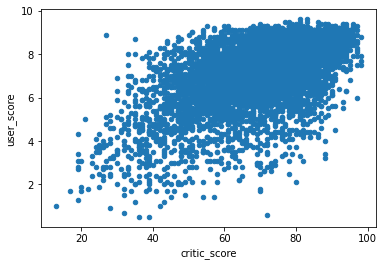

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,user_score_int
year_of_release,1.000000,-0.020358,0.038065,-0.041698,0.038865,-0.011282,-0.251291,-0.245193
na_sales,-0.020358,1.000000,0.840074,0.467151,0.727147,0.233327,0.086267,0.084252
eu_sales,0.038065,0.840074,1.000000,0.518746,0.716508,0.212275,0.055677,0.055351
jp_sales,-0.041698,0.467151,0.518746,1.000000,0.394240,0.146221,0.127081,0.124277
other_sales,0.038865,0.727147,0.716508,0.394240,1.000000,0.191129,0.057235,0.055190
critic_score,-0.011282,0.233327,0.212275,0.146221,0.191129,1.000000,0.580822,0.567259
user_score,-0.251291,0.086267,0.055677,0.127081,0.057235,0.580822,1.000000,0.980274
user_score_int,-0.245193,0.084252,0.055351,0.124277,0.055190,0.567259,0.980274,1.000000


In [13]:
# to do this, I will bring the indicators to a digital format
data_scores ["user_score"] = data_scores ["user_score"].replace("tbd", np.nan)
data_scores ["user_score"] = data_scores ["user_score"].fillna(-1)

data_scores['user_score_int'] = round(data_scores['user_score'].astype(float), 0).astype(int)
data_scores = data_scores.reset_index(drop = True)
data_scores['user_score'] = data_scores['user_score'].astype(float)

# I am removing the values -1 from the dataset in order to calculate the correlation only by known parameters
data_scores = data_scores.loc[data_scores['user_score'] > 0]
data_scores.plot(kind = "scatter", x = "critic_score" , y = "user_score" )
plt.show()

display(data_scores.corr())

data["user_score"] = data["user_score"].replace("tbd", np.nan)


Conclusion:
* the correlation between user_score and critic_score = 0.58. No linear dependence was found either on the graph or in the function. So we can't replace the average value from one column and put it in another
* it will not be possible to pick up values from another column, so we will replace the values with np.nan

I will bring the year to int type, to replace the passes, we will choose the platform average 

In [14]:
display(data.loc[data["year_of_release"].isna()].head(30))

data["year_of_release"] = data["year_of_release"].fillna(999)

display(data.loc[183])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


name               Madden NFL 2004
platform                       PS2
year_of_release              999.0
genre                       Sports
na_sales                      4.26
eu_sales                      0.26
jp_sales                      0.01
other_sales                   0.71
critic_score                  94.0
user_score                     8.5
rating                           E
Name: 183, dtype: object

I am changing the data types for user_score - value and year_of_release - floating

In [15]:
data["user_score"] = data["user_score"].astype(float)
data["year_of_release"] = data["year_of_release"].astype(int)

display(data)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16705,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16706,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16707,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16710 non-null  object 
 1   platform         16710 non-null  object 
 2   year_of_release  16710 non-null  int64  
 3   genre            16710 non-null  object 
 4   na_sales         16710 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16710 non-null  float64
 7   other_sales      16710 non-null  float64
 8   critic_score     8134 non-null   float64
 9   user_score       7587 non-null   float64
 10  rating           9946 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Let's see what the critic_score and user_score distributions are

In [16]:
# let's write a function to output estimates
def prnt_score_func(df):
    df["critic_score"].hist(bins = 100)
    plt.xlabel("critic_score")
    plt.ylabel("Frequency")
    plt.title("Frequency of distribution of critic_score")
    plt.show()
    
    df["user_score"].hist(bins = 100)
    plt.xlabel("user_score")
    plt.ylabel("Frequency")
    plt.title("Frequency of distribution of user_score")
    plt.show()
    return 0

Before replacing missing values


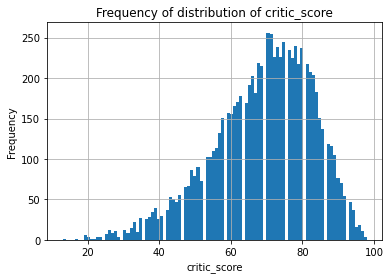

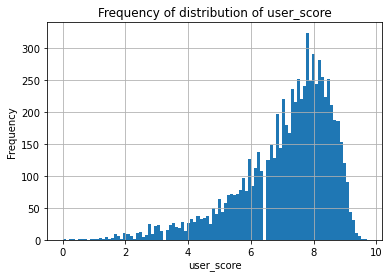

After replacing the missing values


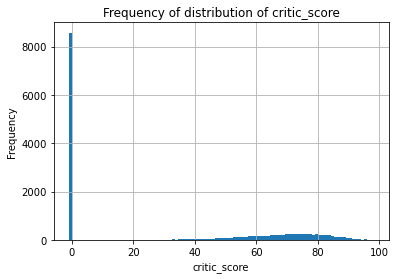

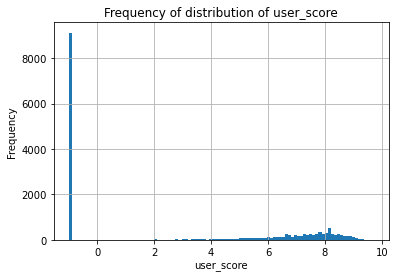

0

In [17]:
# let's output the initial array
print("Before replacing missing values")
prnt_score_func(data)


# we will remove the value in name and genre, since there are few of them, and with the rest we will replace it with a suitable "Unknown". For numeric values, replace the values with -1
data = data.dropna( subset = ["name", "genre"]).reset_index(drop = True) 
data["critic_score"] = data["critic_score"].fillna(-1)
data["user_score"] = data["user_score"].fillna(-1)

data["rating"] = data["rating"].fillna("Unknown")

print("After replacing the missing values")
prnt_score_func(data)

Let's add a column with total sales

In [18]:
data["total_sales"] = data["na_sales"] + data["eu_sales"] + data["jp_sales"]+ data["other_sales"]

display(data.head(50))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,Unknown,28.31


Check that all values have been replaced

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16710 non-null  object 
 1   platform         16710 non-null  object 
 2   year_of_release  16710 non-null  int64  
 3   genre            16710 non-null  object 
 4   na_sales         16710 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16710 non-null  float64
 7   other_sales      16710 non-null  float64
 8   critic_score     16710 non-null  float64
 9   user_score       16710 non-null  float64
 10  rating           16710 non-null  object 
 11  total_sales      16710 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Conclusion:
* all missing values are processed correctly



### Step 3. Conducting a research analysis of the data
* Let's 
    * See how many games were released among years. Is the data for all periods important?
    * See how sales have changed across platforms. Select the platforms with the highest total sales and build a distribution by year. For what characteristic period of time do new platforms appear and old ones disappear?
    * Take data for the relevant current period. Determine the current period yourself as a result of the study of previous questions. The main factor is that these data will help to build a forecast for 2017.
    * Do not take into account data from previous years in your work
    * Build a "box with a mustache" chart for global game sales by platform. Describe the result.
    * See how the reviews of users and critics affect sales within one popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Formulate conclusions. 
    * Correlate the findings with the sales of games on other platforms.
    * Look at the overall distribution of games by genre. What can be said about the most profitable genres? Do genres with high and low sales stand out?
    * Check which platforms are leading in sales, are they growing or falling? Let's select several potentially profitable platforms

Let's look at the distribution of game sales for each year

In [20]:
data_sales_by_year = data.pivot_table(index = "year_of_release", values = ["name", "total_sales"] , aggfunc = ['count','sum'])
print(data_sales_by_year)

                count                     sum
                 name total_sales total_sales
year_of_release                              
999               268         268       98.44
1980                9           9       11.38
1981               46          46       35.68
1982               36          36       28.88
1983               17          17       16.80
1984               14          14       50.35
1985               14          14       53.95
1986               21          21       37.08
1987               16          16       21.70
1988               15          15       47.21
1989               17          17       73.45
1990               16          16       49.37
1991               41          41       32.23
1992               43          43       76.16
1993               60          60       45.99
1994              121         121       79.23
1995              219         219       88.12
1996              263         263      199.15
1997              289         289 

Conclusion:
* interestig to notice there has been a rise in sales of classic games since 1996
* I will use data sterting from 1996 for analysis

In [21]:
print(data.pivot_table(index = "platform", values = "total_sales" , aggfunc = 'sum').sort_values(by = "total_sales"))
data = data.loc[data["year_of_release"] >= 1996]

          total_sales
platform             
PCFX             0.03
GG               0.04
3DO              0.10
TG16             0.16
WS               1.42
NG               1.44
SCD              1.86
DC              15.95
GEN             28.35
SAT             33.59
PSV             54.07
WiiU            82.19
2600            96.98
XOne           159.32
GC             198.93
SNES           200.04
N64            218.68
NES            251.05
GB             255.46
XB             257.74
3DS            259.00
PC             259.52
PSP            294.05
PS4            314.14
GBA            317.85
PS             730.86
DS             806.12
Wii            907.51
PS3            939.16
X360           970.17
PS2           1255.77


Conclusion: 
* PS2 has about 1.26 billion copies sold. This is the first place among all platforms.
* The top three platforms are PS2, Wii and X360

Let's see how sales by platform have been changing. I selecting the platforms with the highest total sales and build a distribution by year. 
Let's see for what characteristic period of time do new platforms appear and old ones disappear?


In [22]:
data_sales_by_platform = data.pivot_table(index = "platform", values = "total_sales" , aggfunc = "sum" ).sort_values(by = "total_sales")

Let's choose platforms with sales of more than 130 million

In [23]:
data_sales_by_platform = data_sales_by_platform.loc[data_sales_by_platform["total_sales"] >130 ]
platform_to_analize = data_sales_by_platform.index
platform_to_analize = pd.Series(platform_to_analize)
print(platform_to_analize)

data = data.query("platform in @platform_to_analize")

0       GB
1     XOne
2       GC
3      N64
4       PC
5       XB
6      3DS
7      PSP
8      GBA
9      PS4
10      PS
11      DS
12     Wii
13     PS3
14    X360
15     PS2
Name: platform, dtype: object


GB 



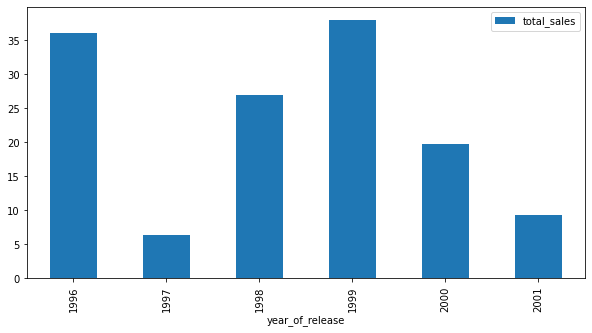

XOne 



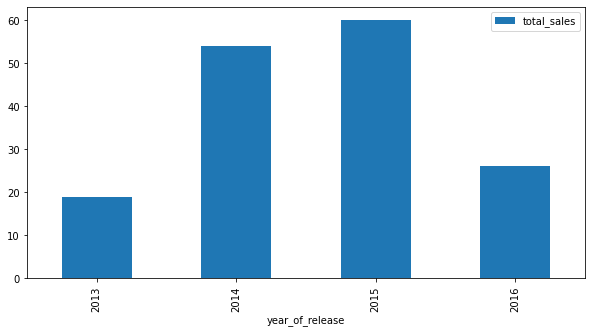

GC 



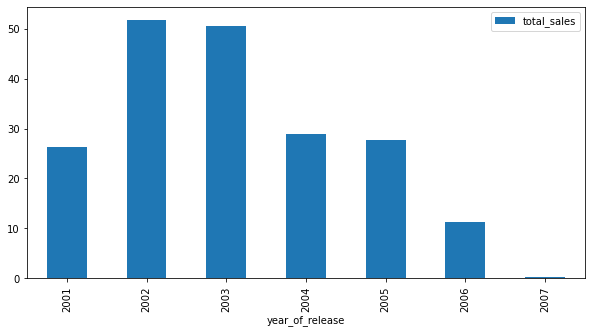

N64 



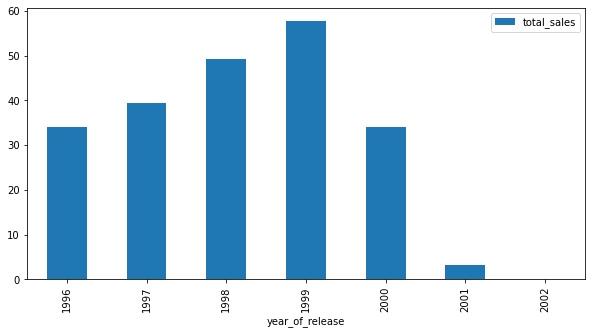

PC 



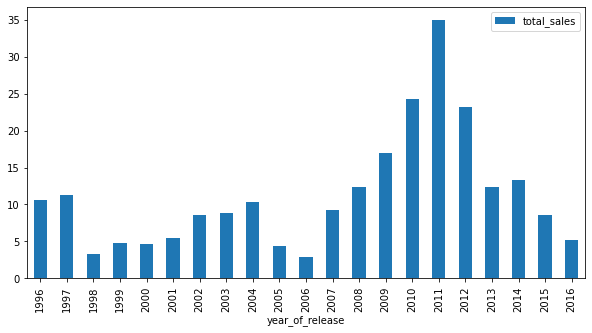

XB 



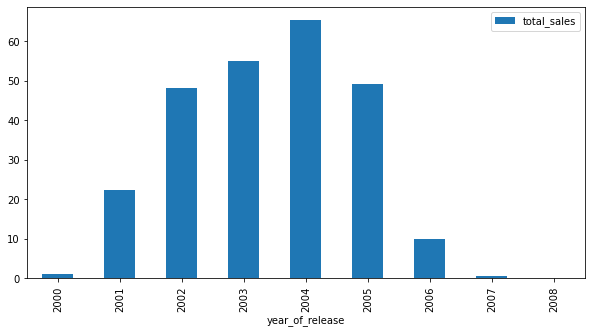

3DS 



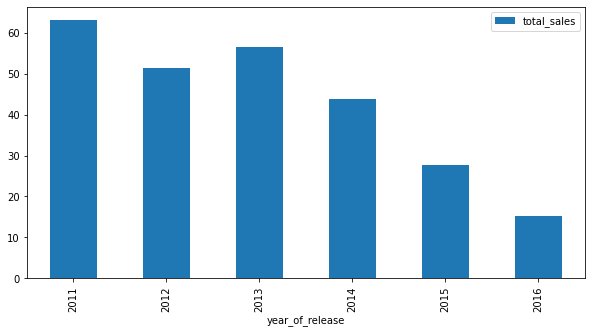

PSP 



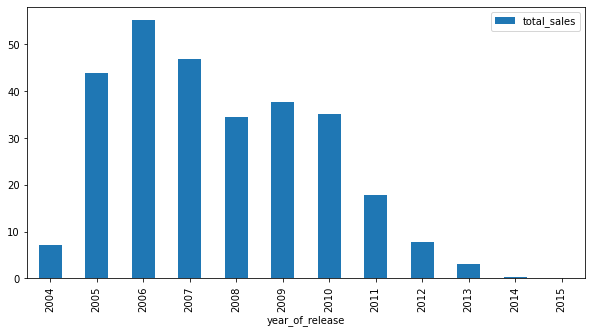

GBA 



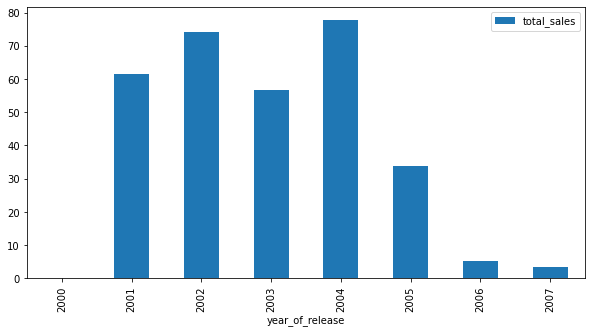

PS4 



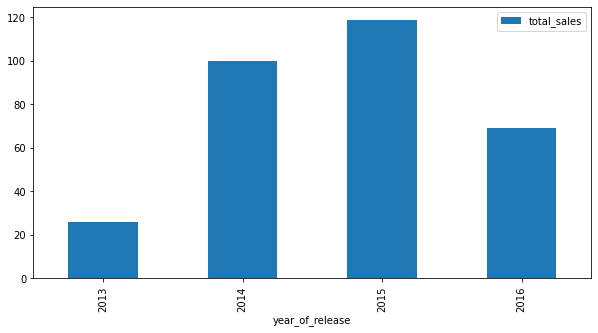

PS 



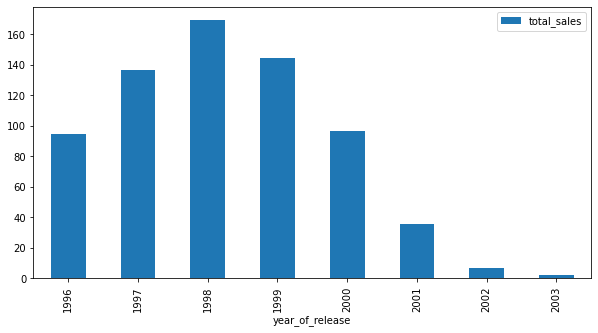

DS 



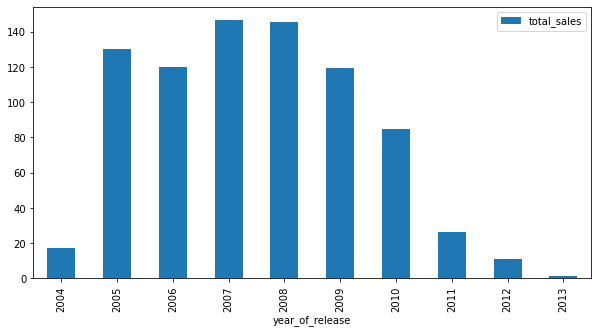

Wii 



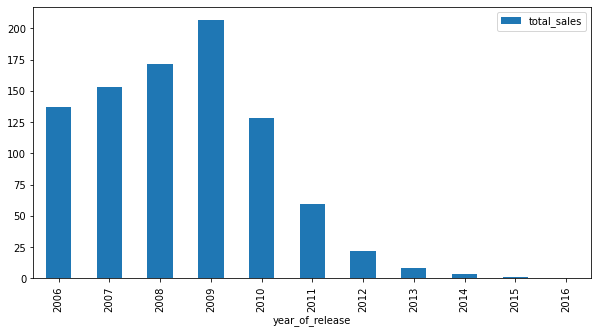

PS3 



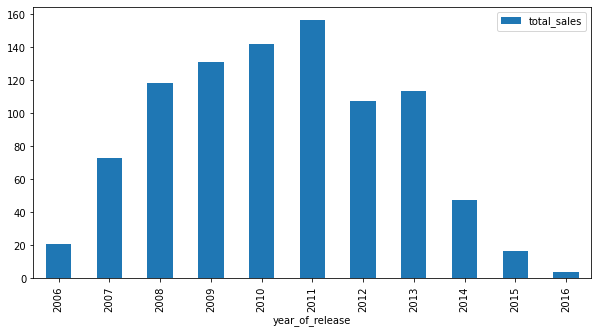

X360 



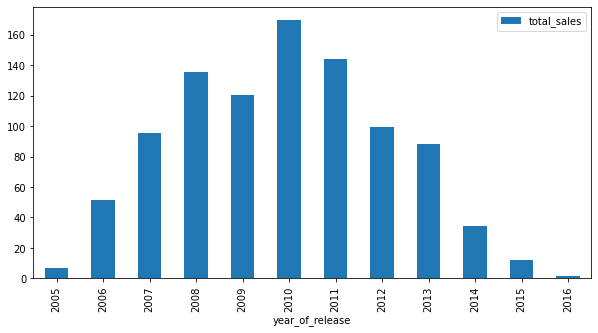

PS2 



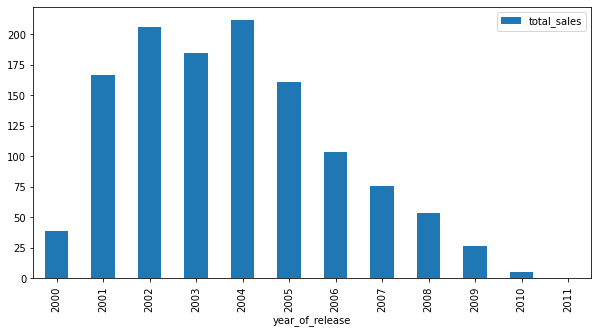

In [24]:
for i in platform_to_analize:
    print(i, "\n")
    data_to_plot = data.loc[data["platform"] == i]
    data_to_plot.pivot_table(index = "year_of_release", values = "total_sales", aggfunc = "sum").plot( kind = "bar",  figsize = (10,5), xlim = (1996, 2016))
    plt.show()
    

Conclusion:
* on average, platforms live from 4 to 7 years. The longest-lived pc. Games on it were released for the entire time of the study
* it is necessary to invest in platforms for which games are still being released: XOne, PC, 3ds, PS4, PS3, Wii, X360
* it is better to choose platforms according to 2 criteria: current sales and growth rate - for example, 2017 is the year when there is a generation change. The ps3 is still relevant and the ps4 has already been released. Similar situation for x360 and Xone. The old generation is "cash cows", and 2 is "stars" according to the BCG matrix.

In [25]:
platform_to_research = ["XOne", "PC", "3DS", "PS4", "PS3", "Wii", "X360"]
platform_to_research = pd.Series(platform_to_research)
data = data.query("platform in @platform_to_research").reset_index(drop = True)

display(data.query("platform == '3DS'").head(50))

#let's find the minimum year for 3DS console release 
print("The year when consoles started", data.loc[data["platform"]!= "PC"]["year_of_release"].min())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Unknown,14.60
19,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
23,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,Unknown,11.68
26,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
32,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
39,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
50,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,Unknown,7.55
59,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,-1.0,-1.0,Unknown,7.14
96,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,-1.0,-1.0,Unknown,5.22
114,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59


The year when consoles started 2005


Conclusion:
* If we continue to look at the data from 1996 to 2016, we will capture the period of trend change in the video game market, plus we see from the graphs above that many platforms have managed to lose their popularity during this time.
* Let's limit the data since 2005

In [26]:
data = data.loc[data["year_of_release"] >= 2005].reset_index(drop = True)
print(data.count())

name               5786
platform           5786
year_of_release    5786
genre              5786
na_sales           5786
eu_sales           5786
jp_sales           5786
other_sales        5786
critic_score       5786
user_score         5786
rating             5786
total_sales        5786
dtype: int64


Let's make a box plot chart for global game sales by platform

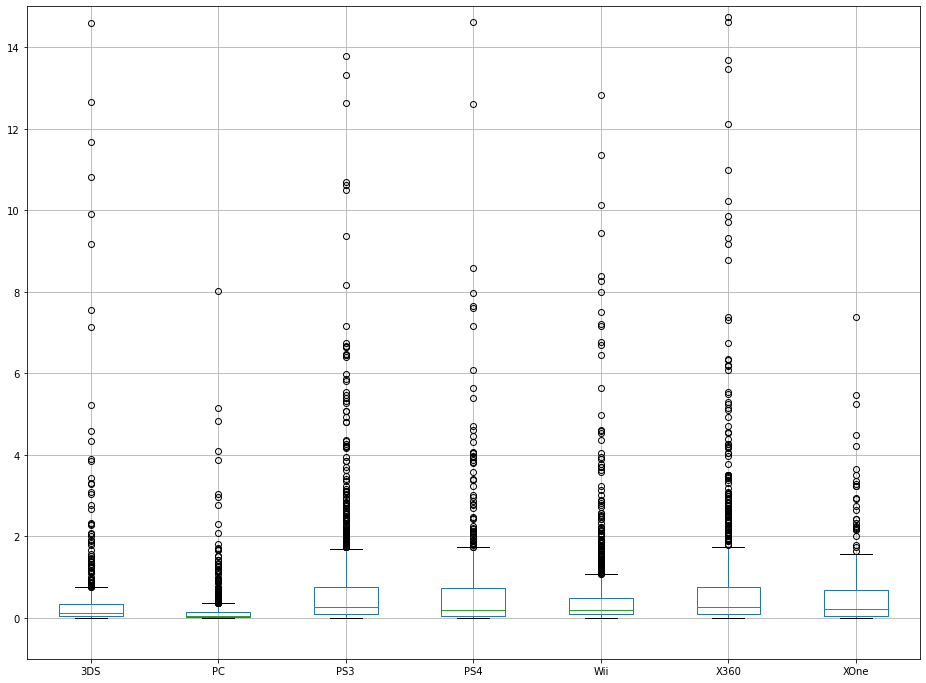

In [27]:
data_to_plot = data.pivot_table(index = "name", columns = "platform", values = "total_sales", aggfunc = "sum").boxplot(figsize=(16, 12), grid=True)
plt.ylim(-1,15)
plt.show()


Conclusion:
* PS3, PS4, X360 and XOne have similar indicators on average (about 500 copies) and 75% quantile (up to 1 million sales)

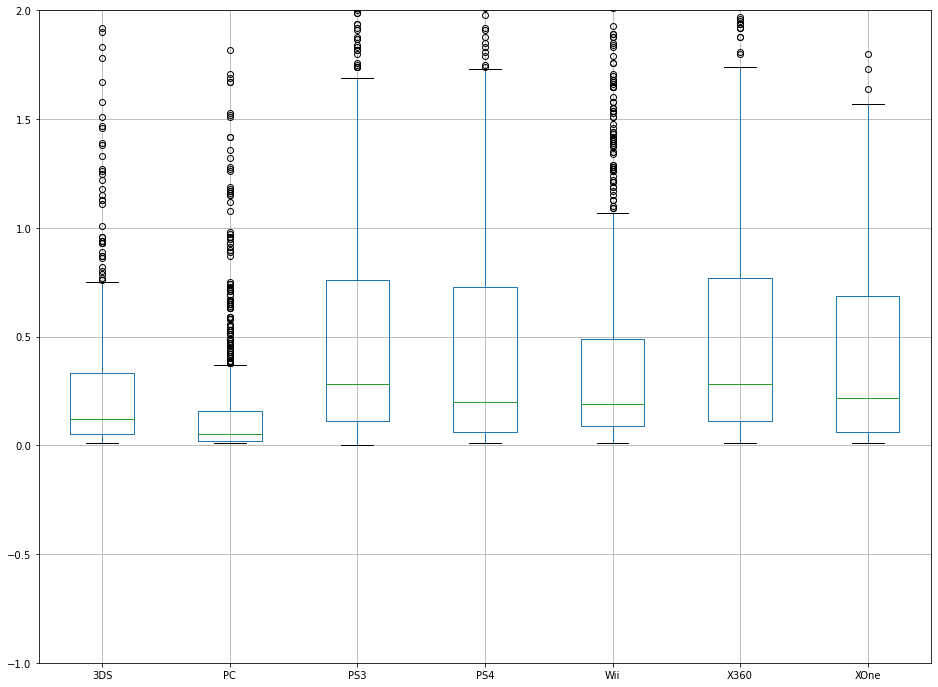

In [28]:
data_to_plot = data.pivot_table(index = "name", columns = "platform", values = "total_sales", aggfunc = "sum").boxplot(figsize=(16, 12), grid=True)
plt.ylim(-1,2)
plt.show()


Let's see how the users and critics scores affect sales within one platform


In [29]:
# let's filter data by value, where we know both critic_score and user_score
data = data.loc[data["critic_score"]!= -1]
data = data.loc[data["user_score"]!= -1].reset_index(drop = True)

display(data.head(50))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
4,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
5,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
6,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
7,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
8,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
9,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


XOne 

              total_sales  critic_score  user_score
total_sales      1.000000      0.410422   -0.094003
critic_score     0.410422      1.000000    0.472462
user_score      -0.094003      0.472462    1.000000
user_score


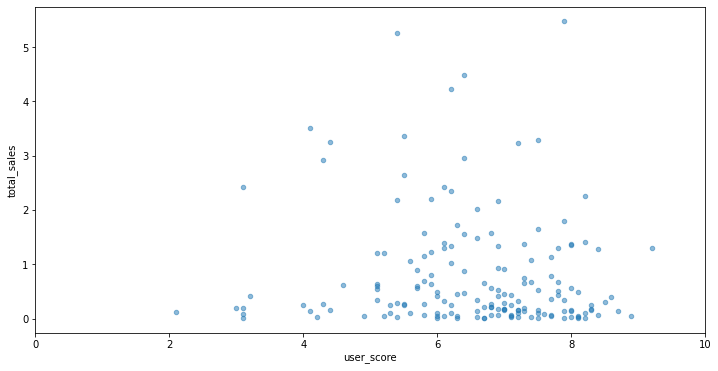

critic_score


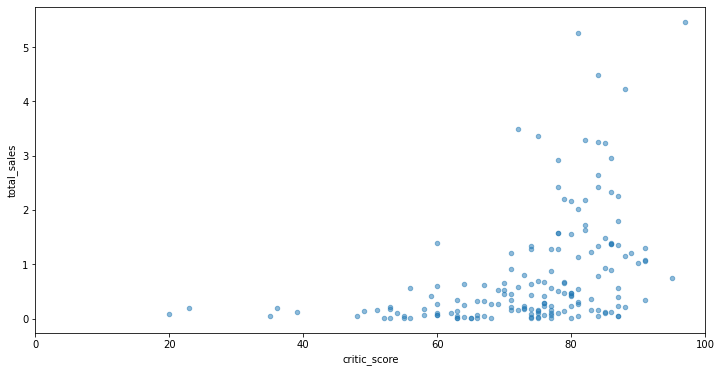

PC 

              total_sales  critic_score  user_score
total_sales      1.000000      0.277187   -0.026574
critic_score     0.277187      1.000000    0.531154
user_score      -0.026574      0.531154    1.000000
user_score


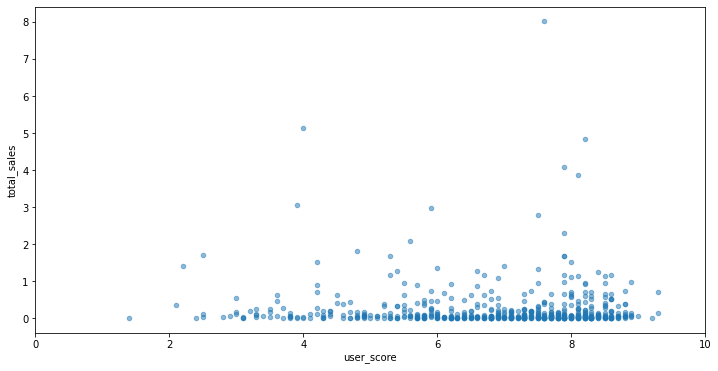

critic_score


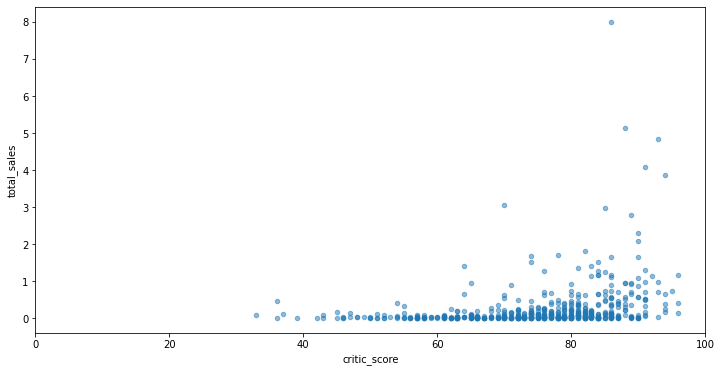

3DS 

              total_sales  critic_score  user_score
total_sales      1.000000      0.338904    0.232089
critic_score     0.338904      1.000000    0.745222
user_score       0.232089      0.745222    1.000000
user_score


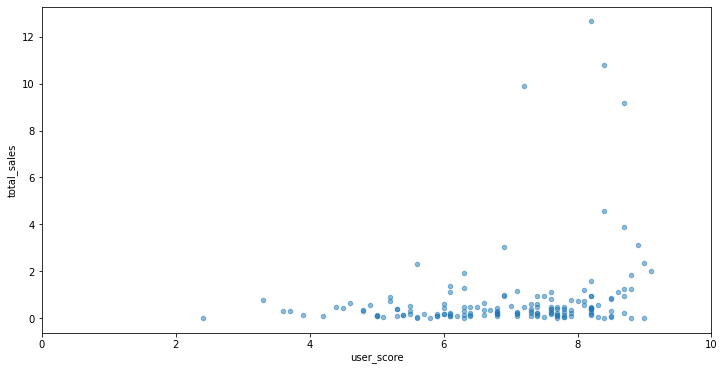

critic_score


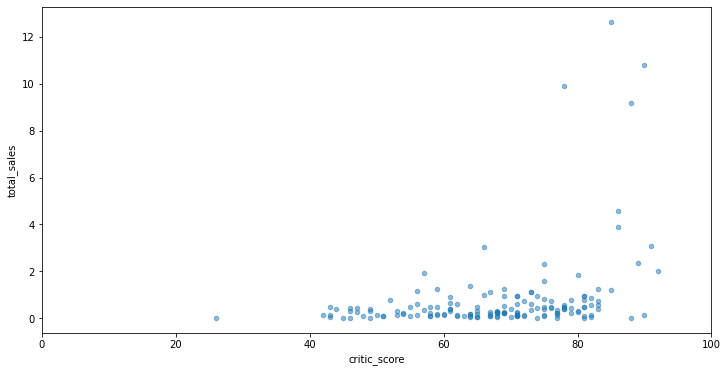

PS4 

              total_sales  critic_score  user_score
total_sales      1.000000      0.405895   -0.033625
critic_score     0.405895      1.000000    0.557654
user_score      -0.033625      0.557654    1.000000
user_score


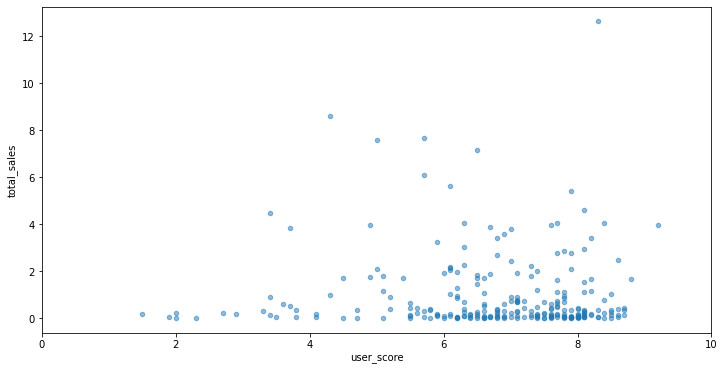

critic_score


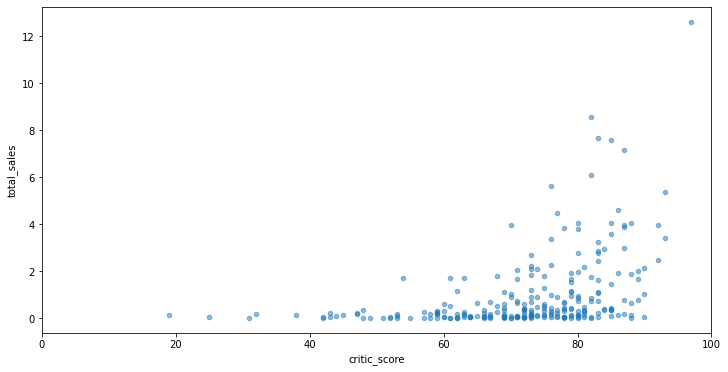

PS3 

              total_sales  critic_score  user_score
total_sales      1.000000      0.429181    0.143381
critic_score     0.429181      1.000000    0.632847
user_score       0.143381      0.632847    1.000000
user_score


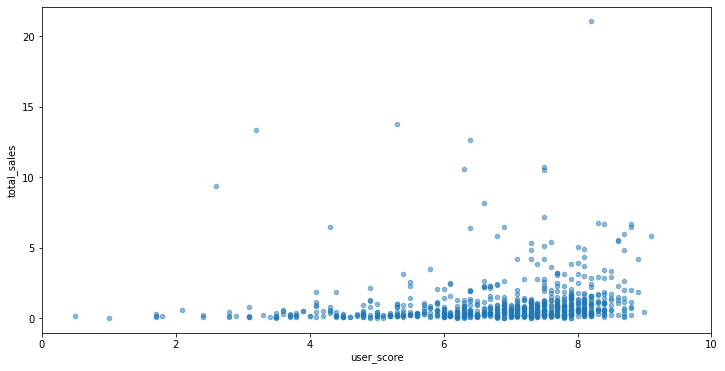

critic_score


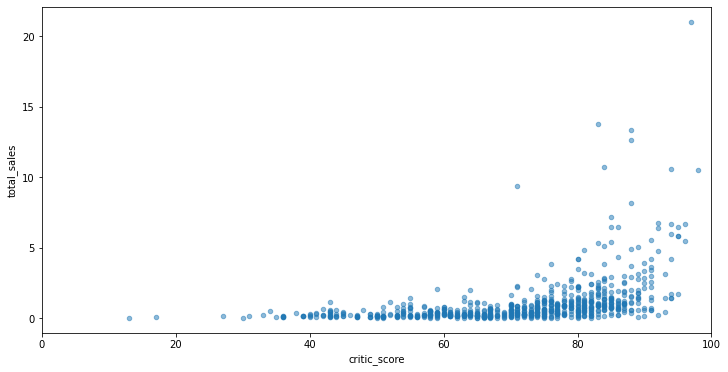

Wii 

              total_sales  critic_score  user_score
total_sales      1.000000      0.170855    0.110637
critic_score     0.170855      1.000000    0.688285
user_score       0.110637      0.688285    1.000000
user_score


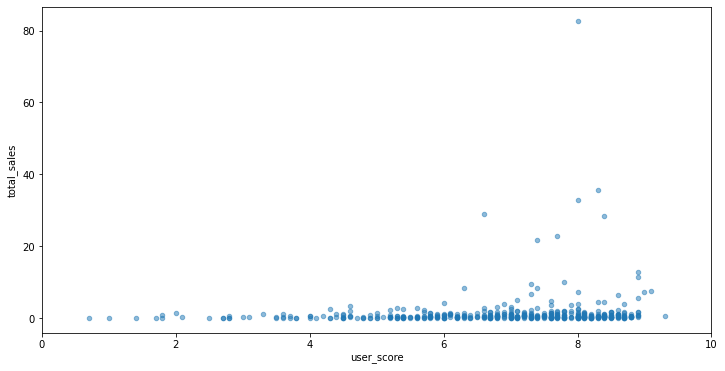

critic_score


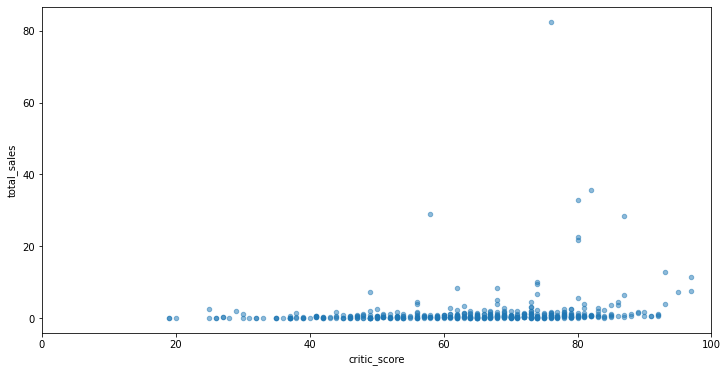

X360 

              total_sales  critic_score  user_score
total_sales      1.000000      0.389040    0.110179
critic_score     0.389040      1.000000    0.624557
user_score       0.110179      0.624557    1.000000
user_score


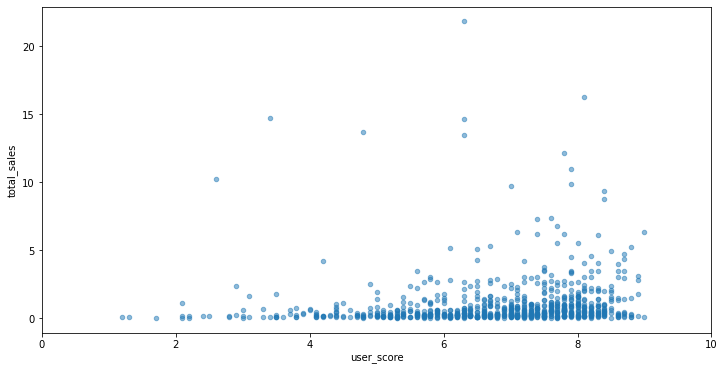

critic_score


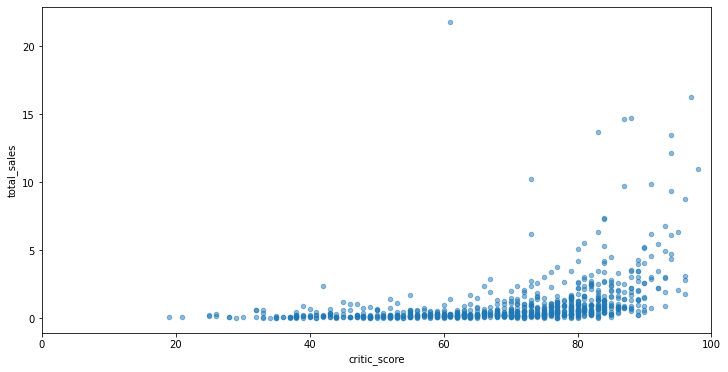

In [30]:
for i in platform_to_research:
    print(i, "\n")
    data_to_plot = data.loc[data["platform"] == i]
    data_to_plot = data_to_plot[["total_sales", "critic_score", "user_score"]]
    print(data_to_plot.corr())
    
    print("user_score")
    data_to_plot.plot(kind = "scatter", x= "user_score", y = "total_sales", figsize = (12,6),alpha=0.5, xlim = (0,10)  )
    plt.show()
    
    print("critic_score")
    data_to_plot.plot(kind = "scatter", x= "critic_score", y = "total_sales", figsize = (12,6), alpha=0.5,xlim = (0,100) )
    plt.show()  

Conclusion:
* the dependence on all data is rather the right branch of the polynomial function (example below). The higher the score of critics and players, the more likely it is that the game will sell a large circulation

### пример зависимости

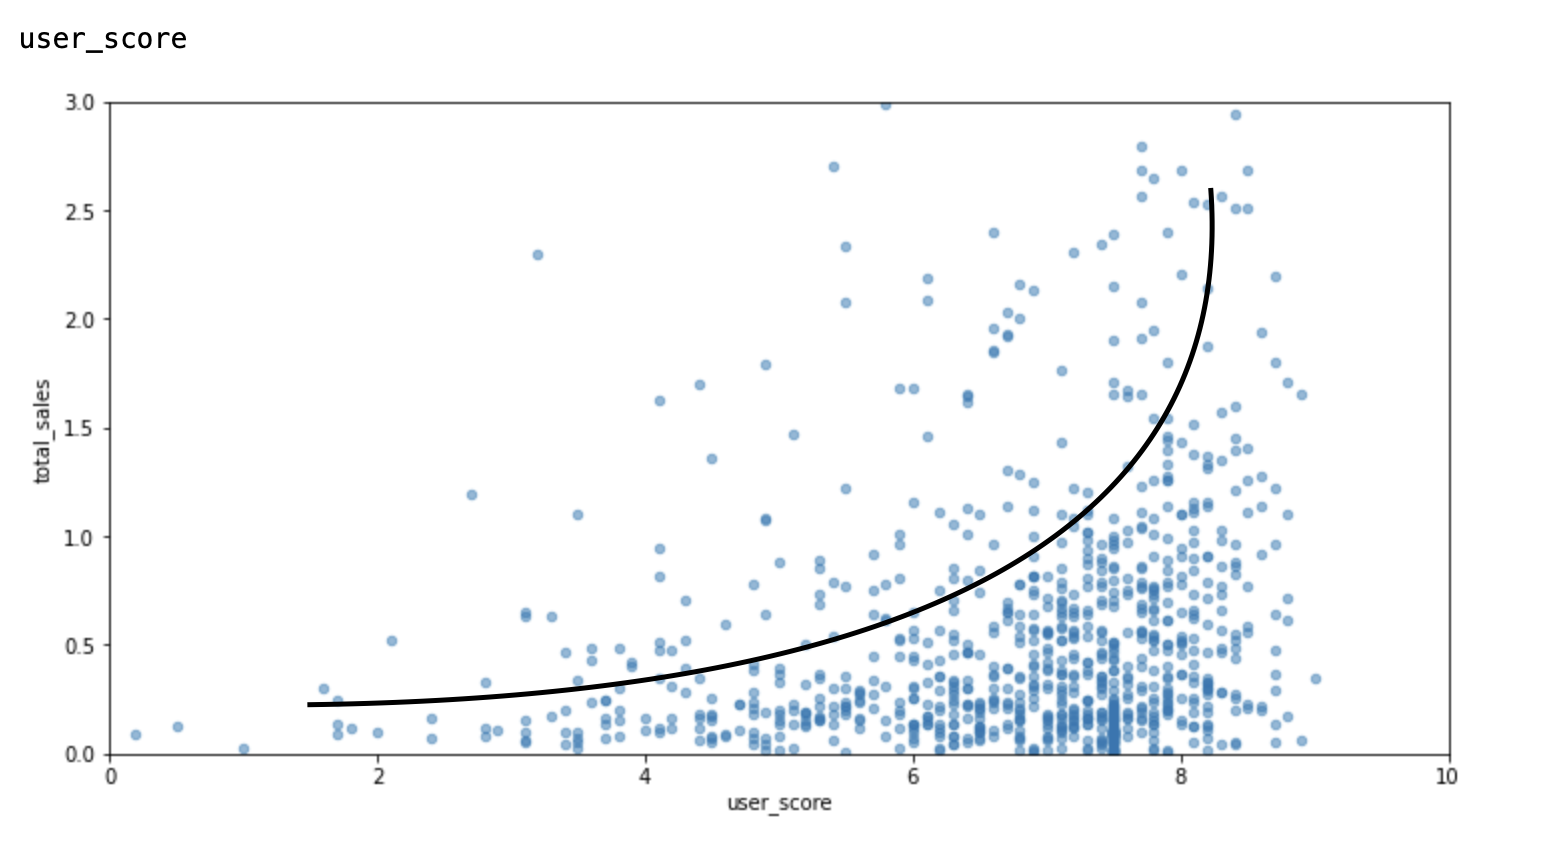

Let's check the dependence on the horizon of 75% + 3 std deviation

XOne 

              total_sales  critic_score  user_score
total_sales      1.000000      0.410422   -0.094003
critic_score     0.410422      1.000000    0.472462
user_score      -0.094003      0.472462    1.000000
user_score


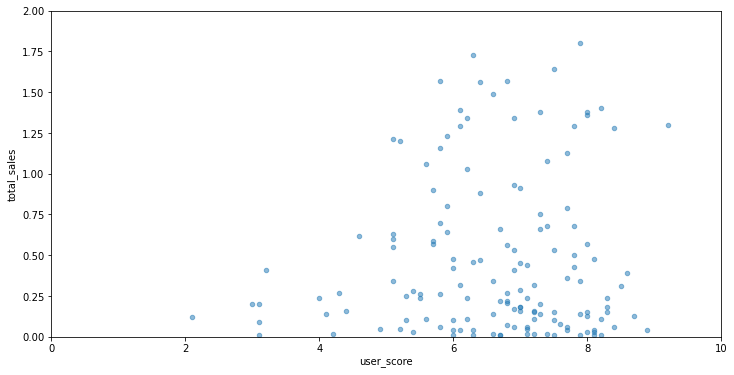

critic_score


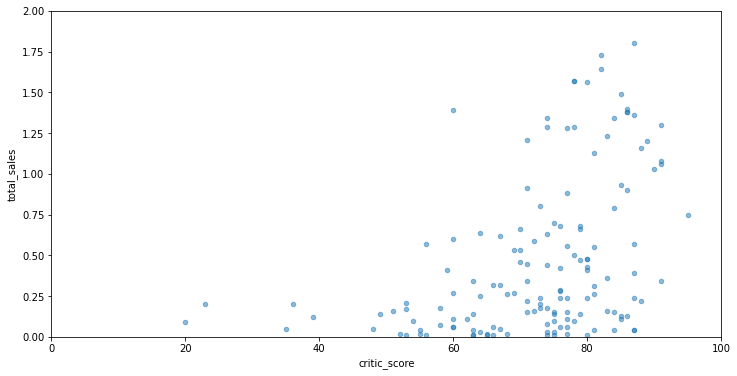

PC 

              total_sales  critic_score  user_score
total_sales      1.000000      0.277187   -0.026574
critic_score     0.277187      1.000000    0.531154
user_score      -0.026574      0.531154    1.000000
user_score


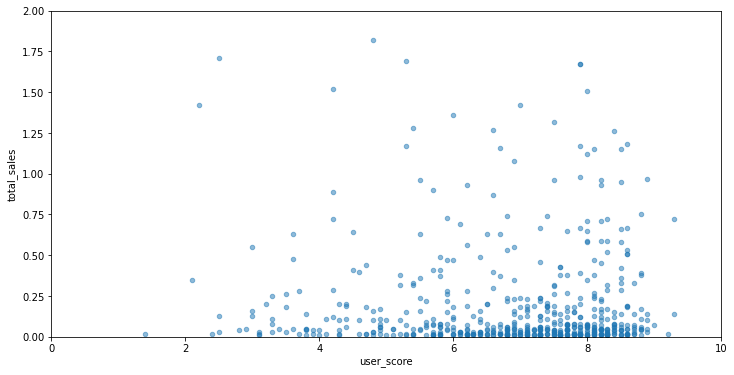

critic_score


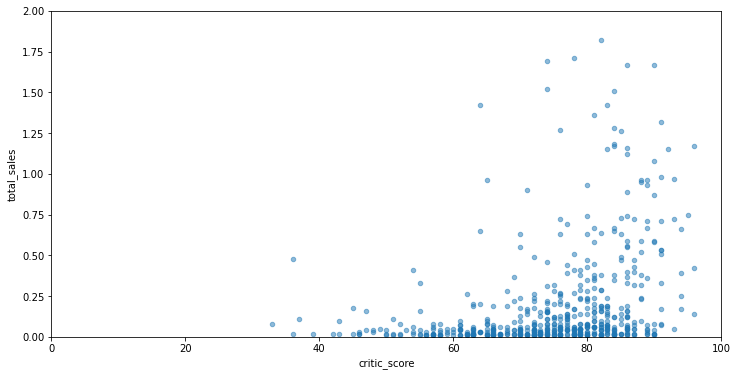

3DS 

              total_sales  critic_score  user_score
total_sales      1.000000      0.338904    0.232089
critic_score     0.338904      1.000000    0.745222
user_score       0.232089      0.745222    1.000000
user_score


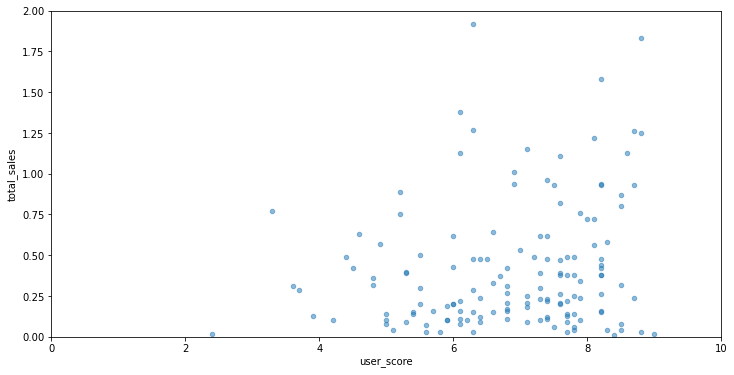

critic_score


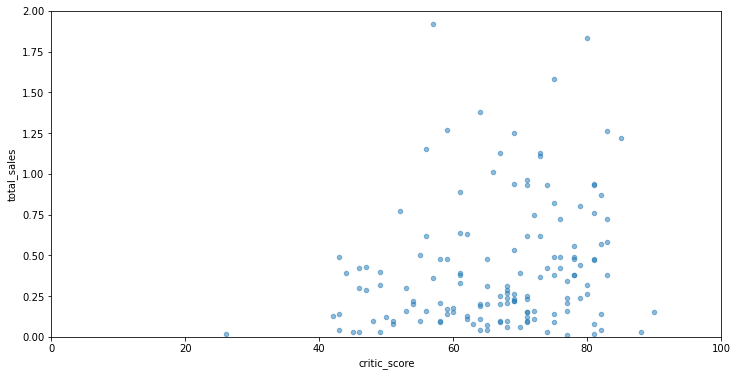

PS4 

              total_sales  critic_score  user_score
total_sales      1.000000      0.405895   -0.033625
critic_score     0.405895      1.000000    0.557654
user_score      -0.033625      0.557654    1.000000
user_score


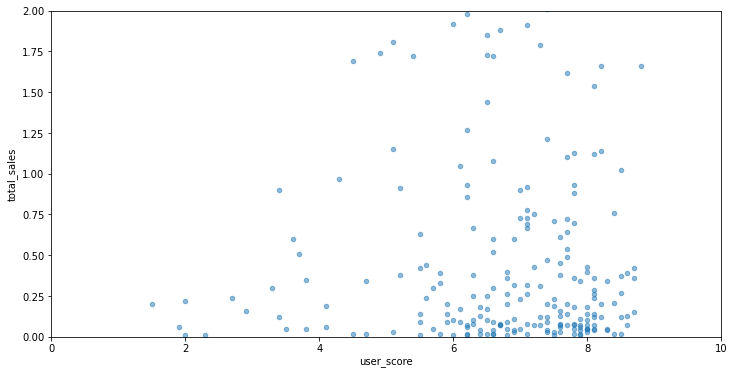

critic_score


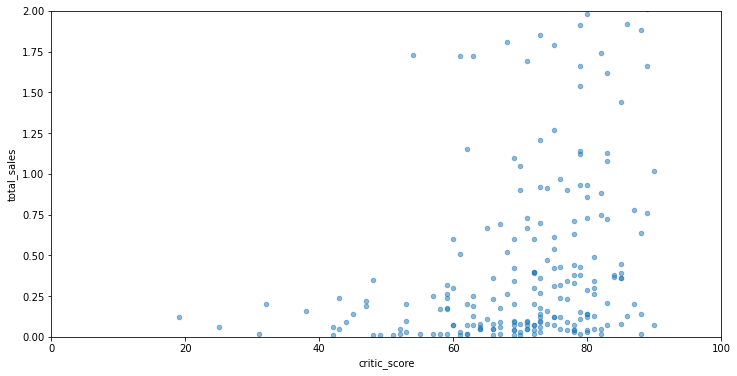

PS3 

              total_sales  critic_score  user_score
total_sales      1.000000      0.429181    0.143381
critic_score     0.429181      1.000000    0.632847
user_score       0.143381      0.632847    1.000000
user_score


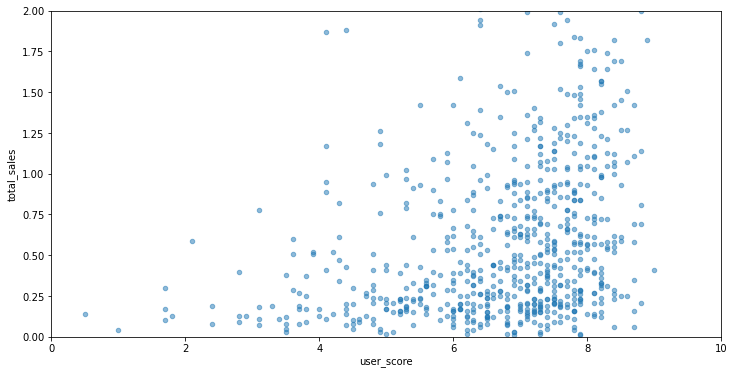

critic_score


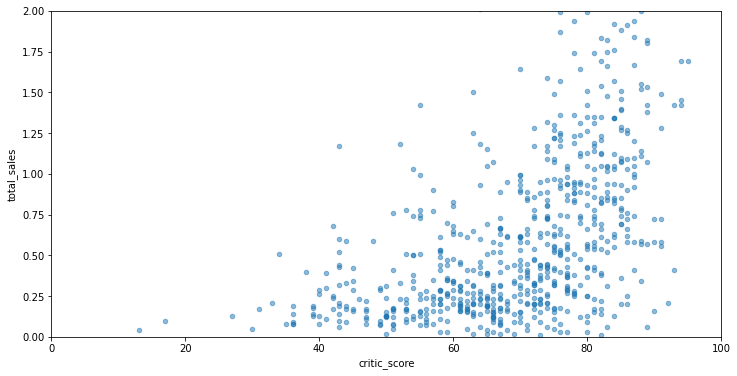

Wii 

              total_sales  critic_score  user_score
total_sales      1.000000      0.170855    0.110637
critic_score     0.170855      1.000000    0.688285
user_score       0.110637      0.688285    1.000000
user_score


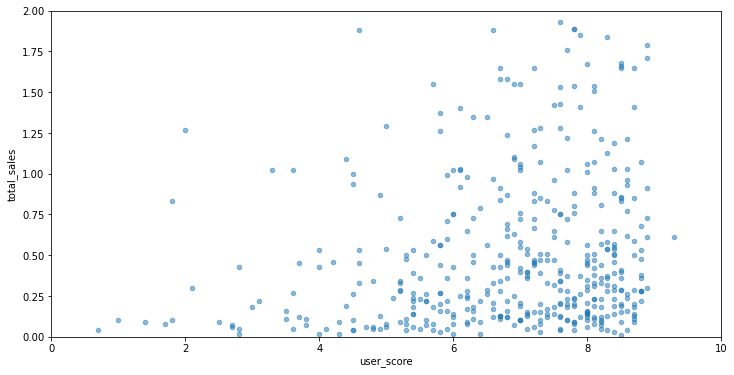

critic_score


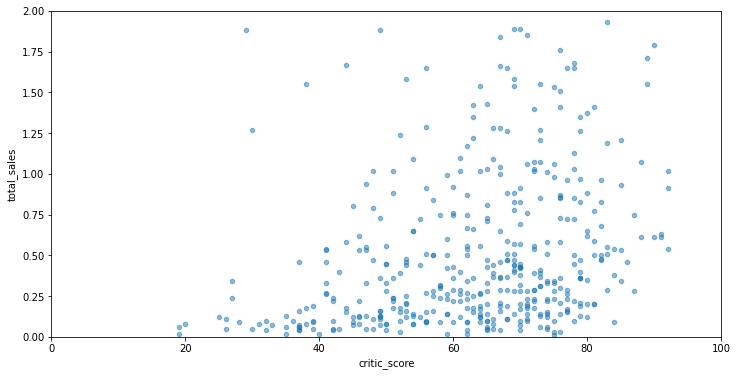

X360 

              total_sales  critic_score  user_score
total_sales      1.000000      0.389040    0.110179
critic_score     0.389040      1.000000    0.624557
user_score       0.110179      0.624557    1.000000
user_score


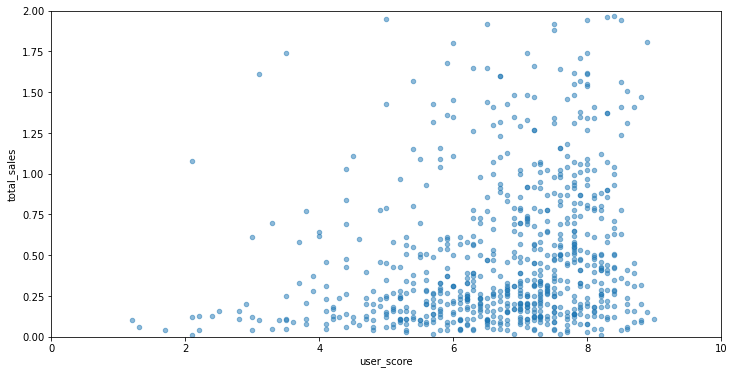

critic_score


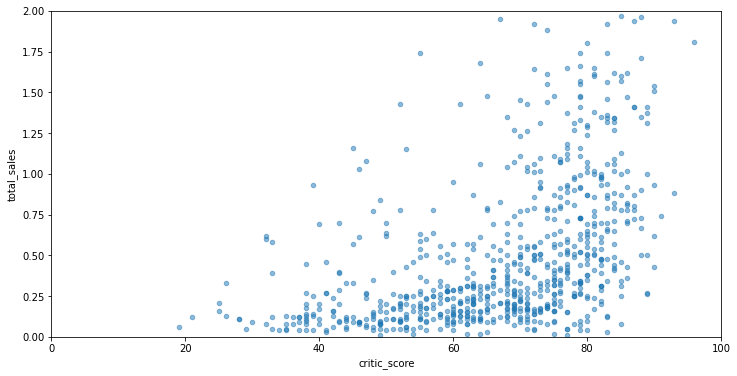

In [31]:
for i in platform_to_research:
    print(i, "\n")
    data_to_plot = data.loc[data["platform"] == i]
    data_to_plot = data_to_plot[["total_sales", "critic_score", "user_score"]]
    print(data_to_plot.corr())
    
    print("user_score")
    data_to_plot.plot(kind = "scatter", x= "user_score", y = "total_sales", figsize = (12,6),alpha=0.5, xlim = (0,10), ylim = (0,2)  )
    plt.show()
    
    
    print("critic_score")
    data_to_plot.plot(kind = "scatter", x= "critic_score", y = "total_sales", figsize = (12,6), alpha=0.5,xlim = (0,100), ylim = (0,2) )
    plt.show()
 

Conclusion
* the dependence can be traced on values up to 2 million copies, but a simpler correlation is not visible
    
    

Let's look at the general distribution of games by genre

In [32]:
print(data.pivot_table(index = "genre", values= "total_sales", aggfunc = ["sum",'count',"mean"]))

                     sum       count        mean
             total_sales total_sales total_sales
genre                                           
Action            711.30         901    0.789456
Adventure          44.14         118    0.374068
Fighting          116.92         165    0.708606
Misc              257.52         205    1.256195
Platform          144.27         121    1.192314
Puzzle             11.85          30    0.395000
Racing            200.34         238    0.841765
Role-Playing      225.02         294    0.765374
Shooter           596.40         484    1.232231
Simulation         87.05         146    0.596233
Sports            513.25         435    1.179885
Strategy           36.08         141    0.255887


Conclusion:
* Top-3 sales genres are: Action, Shooters and Sports. You should invest in their promotion. The smallest two genres are: Puzzle and Strategy.
* There are 4 genres among the median sales of more than 1 million copies. 2 of them are leading in total sales. 

## Step 4 Creating a portrait of the user of each region
* Let's determine for the user of each region (NA, EU, JP):
    * The most popular platforms (top 5)
    * The most popular genres (top 5)

* Let's check if the ESRB rating affect sales in a particular region?

In [33]:
regions = ["na_sales", "eu_sales", "jp_sales"]

let's look at the total sales in the regions

In [34]:
for i in regions:
    
    print(i, round(data[i].sum(), 1))
    

na_sales 1468.8
eu_sales 990.3
jp_sales 161.0


Conclusion:
* Sales in North America are 50% times higher than sales in Europe and 10 times higher than sales in Japan. The North American market is the most promising

Let's look at popular platforms

In [35]:
for i in regions:
      print(data.pivot_table(index = "platform", values = i, aggfunc = "sum").sort_values(i, ascending = False) )

          na_sales
platform          
X360        532.61
Wii         342.91
PS3         341.94
PS4          84.46
XOne         76.03
3DS          48.67
PC           42.15
          eu_sales
platform          
PS3         273.83
X360        234.41
Wii         204.14
PS4         112.44
PC           89.96
XOne         42.23
3DS          33.33
          jp_sales
platform          
PS3          54.72
Wii          52.62
3DS          33.87
X360         10.07
PS4           9.43
XOne          0.29
PC            0.00


Conclusion:
*  wii, ps3 are in the top 3 platforms among all regions. Let's focus on their promotion
* We must remember that a new generation of consoles has recently been released and continue capturingthe market. We need to invest in their promotion.

In [36]:
for i in regions:
    
    print(data.pivot_table(index = "genre", values = i, aggfunc = "sum").sort_values(i, ascending = False))

              na_sales
genre                 
Action          340.22
Shooter         313.15
Sports          266.95
Misc            147.56
Role-Playing    108.51
Racing           82.95
Platform         70.29
Fighting         63.88
Simulation       34.87
Adventure        20.06
Strategy         15.05
Puzzle            5.28
              eu_sales
genre                 
Action          249.62
Shooter         200.87
Sports          170.93
Racing           83.09
Misc             74.02
Role-Playing     65.92
Platform         43.80
Simulation       34.52
Fighting         30.55
Adventure        16.59
Strategy         16.59
Puzzle            3.84
              jp_sales
genre                 
Action           36.67
Role-Playing     27.57
Sports           20.71
Platform         16.38
Shooter          13.39
Misc             11.53
Racing           10.33
Simulation       10.02
Fighting          9.86
Adventure         2.31
Puzzle            1.74
Strategy          0.49


Conclusion:
* 4 of the 5 most popular genres in all regions are the same. It's worth investing in such games
* The most popular genre in Japan is Role-Play

In [37]:
# ESRB raiting
for i in regions:
    
    print(data.pivot_table(index = "rating", values = i, aggfunc = "sum").sort_values(i, ascending = False))

'''
For info:
E - Everyone
T - Teen 
M - Mature 
E10+ - Everyone 10 and older 
EC - Early Childhood 
RP - Rating Pending 
K-A - Kids to Adult
AO - Adults Only 18+ 
'''

         na_sales
rating           
M          530.28
E          439.09
T          312.94
E10+       185.15
Unknown      1.31
RP           0.00
         eu_sales
rating           
M          373.13
E          311.74
T          192.15
E10+       109.17
Unknown      4.12
RP           0.03
         jp_sales
rating           
E           70.40
T           43.57
M           36.23
E10+         9.91
Unknown      0.89
RP           0.00


'\nFor info:\nE - Everyone\nT - Teen \nM - Mature \nE10+ - Everyone 10 and older \nEC - Early Childhood \nRP - Rating Pending \nK-A - Kids to Adult\nAO - Adults Only 18+ \n'

Conclusion:
* the distribution structure of sales by category is the same for NA and EU.
* Games for an audience of 17+ are in the first place - so this is the most actively developing segment
* Further, the rating is essentially a funnel by age of consumers. The lower the age limit, the more willing people will be able to buy the game. The exception is EC games up to 3 years old. Children do not buy games, but their parents do it for them.
* Most games in Japan do not have rating, since rating system is advisory and not mandatory.
* We need to focus on Games for a wide audience or for an audience over 17 years old

## Step 5. Checking the hypotheses
Let's looking if:
* Average user ratings of Xbox One and PC platforms are the same
* Average user ratings of genres Action and Sports are different

* Explain:
    * How did you formulate the null and alternative hypotheses
    * What criteria were used to test hypotheses and why

### Hypothesis 1: The average user ratings of the Xbox One and PC platforms are the same
* H0 Average user ratings of Xbox One and PC platforms are the same
* H1 Average user ratings of Xbox One and PC platforms differ

In [38]:
alpha = 0.05 # statistical significance level

results = st.ttest_ind(
    data.loc[data["platform"]=='PC']["user_score"], 
     data.loc[data["platform"]=='XOne']["user_score"], 
    equal_var = True)

# the test is two-sided: the p-value will be two times less# the test is two-sided: the p-value will be two times less
print('p-value:', results.pvalue)

# we reject the hypothesis only when the sample mean is significantly less than the assumed value
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")
        

p-value: 0.010416983216438504
We reject the null hypothesis


Conclusion:
* the null hypothesis is rejected, the average user ratings of the Xbox One and PC platforms differ

### Hypothesis 2: Average user ratings of the genres Action and Sports are different
* H0 Average user ratings of the Action and Sports platforms are the same
* H1 Average user ratings of the Action and Sports platforms differ

In [39]:

alpha = 0.05 # statistical significance level

results = st.ttest_ind(
    data.loc[data["genre"]=='Action']["user_score"], 
     data.loc[data["genre"]=='Sports']["user_score"])

# the test is two-sided: the p-value will be two times less
print('p-value:', results.pvalue)

# the test is one-sided to the left:
# we reject the hypothesis only when the sample mean is significantly less than the assumed value
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")
    

p-value: 4.419250873755264e-09
We reject the null hypothesis


Conclusion:
* the null hypothesis is rejected, the average user ratings of the Action and Sports platforms are the same

## Conclusions:

* There are no explicit duplicates detected
* There is 'Nan' data for two items. I checked if it was possible to process it. There are <<1% passeв values, so we can delete them
* I discovered that:
    * year of release is float type, but int type fitts better
    * there are a lot of miss values in Critic_Score, User_Score, Rating
    * The age rating is for games in the USA and Canada. If the game didn't release there, then most likely they didn't have a rating either. There could be missed values from here.

* There is a tbd value in the user_score column
* In half of the values where user_score == tbd, we know critic_score. Let's try to estimate their correlation
 
* The correlation between user_score and critic_score = 0.58. No linear dependence was found either on the graph or in the function. So we can't replace the average value from one column and put it in another
* it will not be possible to pick up values from another column, so we will replace the values with np.nan

* PS2 has about 1.26 billion copies sold. This is the first place among all platforms.
* The top three platforms are PS2, Wii and X360

* Platforms live from 4 to 7 years on average. The longest-lived pc. Games on it were released for the entire time of the study
* it is necessary to invest in platforms for which games are still being released: XOne, PC, 3ds, PS4, PS3, Wii, X360
* it is better to choose platforms according to 2 criteria: current sales and growth rate - for example, 2017 is the year when there is a generation change. The ps3 is still relevant and the ps4 has already been released. Similar situation for x360 and Xone. The old generation is "cash cows", and 2 is "stars" according to the BCG matrix. 

* If we continue to look at the data from 1996 to 2016, we will capture the period of trend change in the video game market, plus we see from the graphs above that many platforms have managed to lose their popularity during this time.
* Let's limit the data since 2005 
 
* PS3, PS4, X360 and XOne have similar indicators on average (about 500 copies) and 75% quantile (up to 1 million sales)
 
* Top-3 sales genres are: Action, Shooters and Sports. You should invest in their promotion. The smallest two genres are: Puzzle and Strategy.
* There are 4 genres with the median sales of more than 1 million copies. 2 of them are leading in total sales. 
 
* Sales in North America are 50% times higher than sales in Europe and 10 times higher than sales in Japan. The North American market is the most promising 

* Wii, ps3 are in the top 3 platforms among all regions. Let's focus on their promotion
* We must remember that a new generation of consoles has recently been released and continue capturingthe market. We need to invest in their promotion.
 
* 4 of the 5 most popular genres in all regions are the same. It's worth investing in such games
* The most popular genre in Japan is Role-Play
 
* The distribution structure of sales by category is the same for NA and EU.
* Games for an audience of 17+ are in the first place - so this is the most actively developing segment
* Further, the rating is essentially a funnel by age of consumers. The lower the age limit, the more willing people will be able to buy the game. The exception is EC games up to 3 years old. Children do not buy games, but their parents do it for them.
* Most games in Japan do not have rating, since rating system is advisory and not mandatory.
* We need to focus on Games for a wide audience or for an audience over 17 years old

* Average user ratings of Xbox One and PC platforms differ
* Average user ratings of the Action and Sports platforms differ